<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018

<br>

## Agenda:
1. Introducción.
2. Tipos de problemas y datasets.

<hr>

# 1. Una aproximación inicial al Machine Learning

La aproximación clásica al desarrollo de una solucion reza lo siguiente:
<br>
<br>
<br>
<center><img src="res/intro/Classic Approach.png" width=600></center>
<br><br><br>
Analicemos el siguiente caso para una aplicación de reconocimiento de actividad:
<br><br>
<center><img src="res/intro/example_classic.png" width=800></center>

<hr>
La aproximacion del aprendizaje de maquina reza:
<br><br><br>
<center><img src="res/intro/New Approach.png" width=600></center>
<br><br><br>
Analicemos el siguiente caso de reconocimiento de actividad:
<br><br><br>
<center><img src="res/intro/example_ml.png" width=800></center>

<hr>

## 1.1. Ejemplo utilizando Keras

Cuál es el patrón que siguen los siguientes datos?

<center> <font size=5> $X = [-1, 0, 1, 2, 3, 4] \\ Y = [-3, -1, 1, 3, 5, 7]$ </font> </center>

<br><br><br>
Hagamos que la máquina aprenda por nosotros el patrón subyacente en los datos:

In [1]:
import keras
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
X = np.array([-1,0,1,2,3,4], dtype=float)
Y = np.array([-3,-1,1,3,5,7], dtype=float)

In [3]:
print(X)
print(Y)

[-1.  0.  1.  2.  3.  4.]
[-3. -1.  1.  3.  5.  7.]


### 1.1.1 Creamos un modelo de red neuronal simple (1 neurona)

In [4]:
model = keras.Sequential()
model.add(Dense(units=1, input_shape=[1]))

### 1.1.2. Compilamos el modelo

Definimos el optimizador y el error a minimizar.

In [5]:
model.compile(optimizer='sgd', loss='mean_squared_error')

### 1.1.3. Entrenamiento

Hacemos que el modelo aprenda.

In [6]:
history = model.fit(X, Y, epochs=500, verbose=False)

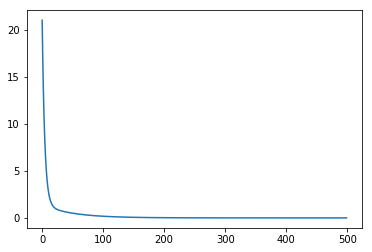

In [7]:
plt.plot(history.history['loss'])
plt.show()

### 1.1.4. Utilizamos el modelo entrenado

In [8]:
model.predict([5])

array([[8.994627]], dtype=float32)

### 1.1.4. Qué aprendió el modelo???

In [9]:
model.get_weights()

[array([[1.9971716]], dtype=float32), array([-0.99123126], dtype=float32)]

<hr>

## 1.2. Trabajemos en clase:

### 1.2.1. Renta de apartamentos
Construyamos una red neuronal simple para el siguiente problema:

Imaginemos que el precio de alquiler de un apartamento viene dato por 500k + 150k por cuarto, por ejemplo, 650 mil pesos para un apartmento con un cuarto, 800 mil pesos para dos cuartos y así sucesivamente.

Cómo podríamos crear un modelo de red neuronal simple para que aprenda estas relaciones de tal forma que el sistema pueda predecir valores por fuera de lo que aprendió?.

__Pista 1__: Estos modelos de aprendizaje funcionan mejor si los datos se escalan, es decir, en términos del resultado final es lo mismo que el sistema reciba el numero 2 (dos cuartos) y entregue como resultado 8 (de 800 mil) y luego se escale a cientos de miles. Sin embargo, para la red es mas facil trabajar con números pequeños o escalados.

__Pista 2__: Si se cuentan con valores intermedios para la entrada, tales como 2.1, 1.4, 3.2, etc. el sistema aprenderá mejor.

### 1.2.2. Función $y = x^2$

Genere un conjunto de datos para la ecuación $y = x^2$ en intente hacer que el sistema aprenda dicha relación. Puede agregar mas capas y neuronas al modelo. Qué resultado obtiene?

<hr>

# 2. Tipos de problemas y datasets

Usualmente los problemas de predicción se dividen en dos categorías:

1. __Clasificación__: En cuyo caso la salida del modelo es DISCRETA, es decir una etiquta o categoria que se asigna al objeto en cuestión.

<center> $G(x) = k; k = \{label_1, label_2, label_3,...,label_n\}$ </center>

2. __Regresión__: En cuyo caso la salida del modelo es CONTINUA, es decir, un valor real que estima a partir de la entrada.

<center> $G(x) = k; k \in R^n$ </center>

<br>

Analicemos el siguiente dataset de la librería <a href="https://scikit-learn.org/stable/index.html">sklearn</a>:

scikit->machine learning: sklearn

In [10]:
from sklearn.datasets import load_boston, load_linnerud

import numpy as np
from tabulate import tabulate

In [11]:
??load_boston

In [12]:
dataset = load_linnerud() #cargamos el dataset

In [13]:
type(dataset)

sklearn.utils.Bunch

In [14]:
entrada = dataset.data #aislamos los valores de entrada del problema
salida = dataset.target #aislamos los valores de salida del problema

In [15]:
print dataset.feature_names

['Chins', 'Situps', 'Jumps']


In [16]:
??load_linnerud

In [17]:
#usualmente los datos se cargan de esta manera

X, Y = dataset.data, dataset.target

In [18]:
print(dataset.target_names)

['Weight', 'Waist', 'Pulse']


In [19]:
#concatenemos X y Y para poder tabularlos
m, n = np.shape(X)

data = np.zeros([m, n+3])

data[:, 0:n] = X
data[:, n:n+3] = Y

In [20]:
#headers = ["x"+str(i) for i in range(n)]+['y']
headers = list(dataset.feature_names)+list(dataset.target_names)

tabla = tabulate(data, headers=headers, tablefmt="fancy_grid", floatfmt=".2f")
print(tabla)

╒═════════╤══════════╤═════════╤══════════╤═════════╤═════════╕
│   Chins │   Situps │   Jumps │   Weight │   Waist │   Pulse │
╞═════════╪══════════╪═════════╪══════════╪═════════╪═════════╡
│    5.00 │   162.00 │   60.00 │   191.00 │   36.00 │   50.00 │
├─────────┼──────────┼─────────┼──────────┼─────────┼─────────┤
│    2.00 │   110.00 │   60.00 │   189.00 │   37.00 │   52.00 │
├─────────┼──────────┼─────────┼──────────┼─────────┼─────────┤
│   12.00 │   101.00 │  101.00 │   193.00 │   38.00 │   58.00 │
├─────────┼──────────┼─────────┼──────────┼─────────┼─────────┤
│   12.00 │   105.00 │   37.00 │   162.00 │   35.00 │   62.00 │
├─────────┼──────────┼─────────┼──────────┼─────────┼─────────┤
│   13.00 │   155.00 │   58.00 │   189.00 │   35.00 │   46.00 │
├─────────┼──────────┼─────────┼──────────┼─────────┼─────────┤
│    4.00 │   101.00 │   42.00 │   182.00 │   36.00 │   56.00 │
├─────────┼──────────┼─────────┼──────────┼─────────┼─────────┤
│    8.00 │   101.00 │   38.00 │   211.0

<hr>

## Trabajemos en clase

1. Revisar la diferencia entre <a href="https://scikit-learn.org/stable/datasets/index.html#toy-datasets">Toy Datasets</a> y <a href="https://scikit-learn.org/stable/datasets/index.html#real-world-datasets">Real World Datasets</a>.

2. Consultar algunos datasets de ambos casos y:
    1. Revisar las entradas, salidas y tipo de problema en cada caso.
    2. Tabular los datos.

<center><a href=></a></center>